# Time Series with Pandas Project Exercise

For this exercise, answer the questions below given the dataset: https://fred.stlouisfed.org/series/UMTMVS

This dataset is the Value of Manufacturers' Shipments for All Manufacturing Industries.

**Import any necessary libraries.**

In [1]:
import pandas as pd
from datetime import timedelta

**Read in the data UMTMVS.csv file from the Data folder**

In [2]:
df = pd.read_csv('UMTMVS.csv',index_col='DATE',parse_dates=True)

**Check the head of the data**

In [3]:
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


**Set the DATE column as the index.**

In [4]:
# CODE HERE

**Check the data type of the index.**

In [5]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

**Convert the index to be a datetime index. Note, there are many, many correct ways to do this!**

**Plot out the data, choose a reasonable figure size**

In [6]:
ax = df['UMTMVS'].plot(figsize=(14,7))
ax.autoscale(axis='x',tight=True)

**What was the percent increase in value from Jan 2009 to Jan 2019?**

In [7]:
def first_day(entry):
    """
    Returns the first instance of the period, regardless of sampling rate.
    """
    if len(entry):  # handles the case of missing data
        return entry[0]

In [8]:
df.resample(rule='A', label='left', loffset=timedelta(days=1)).apply(first_day)

,UMTMVS
DATE,
1992-01-01,209438.0
1993-01-01,223258.0
1994-01-01,234097.0
1995-01-01,260175.0
1996-01-01,263041.0
1997-01-01,280870.0
1998-01-01,290004.0
1999-01-01,293222.0
2000-01-01,314656.0


In [9]:
(df.loc['2019-01-01']['UMTMVS']*100 / df.loc['2009-01-01']['UMTMVS']) - 100

38.47214929650164

**What was the percent decrease from Jan 2008 to Jan 2009?**

In [10]:
(df.loc['2009-01-01']['UMTMVS']*100 / df.loc['2008-01-01']['UMTMVS']) - 100

-22.022775481313047

**What is the month with the least value after 2005?** [HINT](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)

In [11]:
df.loc['2005-01-01':'2019-03-01']['UMTMVS'].idxmin()

Timestamp('2009-01-01 00:00:00')

**What 6 months have the highest value?**

In [12]:
df.resample(rule='M', label='left', loffset=timedelta(days=1)).apply(first_day).head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [13]:
df.nlargest(6, df.columns)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0
2014-06-01,516935.0


**How many millions of dollars in value was lost in 2008? (Another way of posing this question is what was the value difference between Jan 2008 and Jan 2009)**

In [14]:
df.resample(rule='A', label='left', loffset=timedelta(days=1)).apply(first_day)

,UMTMVS
DATE,
1992-01-01,209438.0
1993-01-01,223258.0
1994-01-01,234097.0
1995-01-01,260175.0
1996-01-01,263041.0
1997-01-01,280870.0
1998-01-01,290004.0
1999-01-01,293222.0
2000-01-01,314656.0


In [15]:
(df.loc['2009-01-01']['UMTMVS'] - df.loc['2008-01-01']['UMTMVS']) 

-95206.0

**Create a bar plot showing the average value in millions of dollars per year**

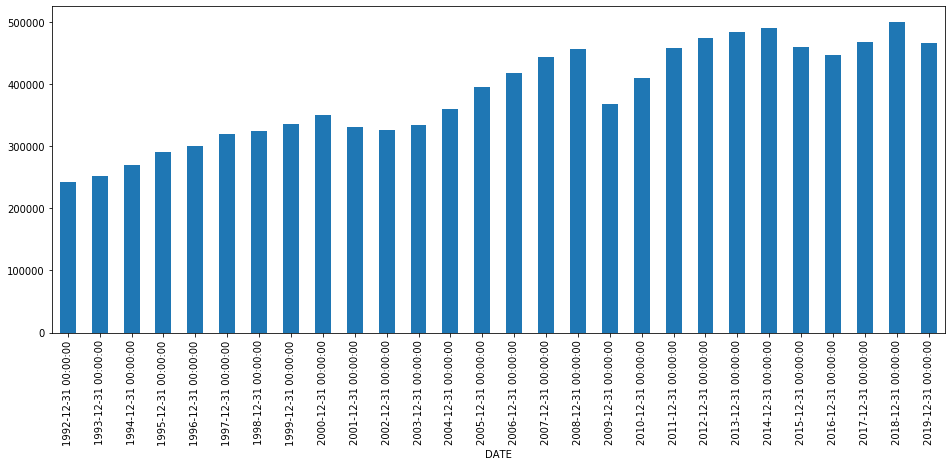

In [16]:
df['UMTMVS'].resample('A').mean().plot.bar(figsize=(16,6), color='#1f77b4');

**What year had the biggest increase in mean value from the previous year's mean value? (Lots of ways to get this answer!)**

[HINT for a useful method](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.idxmax.html)

In [27]:
sample = df.resample(rule='A').mean()

In [42]:
sample.head()

,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667


In [43]:
sample_shift = sample.shift(periods=1)

In [45]:
sample_shift.head()

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,242002.000000
1994-12-31,251708.083333
1995-12-31,269842.666667
1996-12-31,289973.083333


In [48]:
(sample-sample_shift).sort_values('UMTMVS')

,UMTMVS
DATE,
2009-12-31,-87101.250000
2019-12-31,-33173.166667
2015-12-31,-30711.583333
2001-12-31,-19840.416667
2016-12-31,-13693.833333
2002-12-31,-4648.000000
1998-12-31,5426.166667
2014-12-31,6484.500000
2003-12-31,8388.750000


**Plot out the yearly rolling mean on top of the original data. Recall that this is monthly data and there are 12 months in a year!**

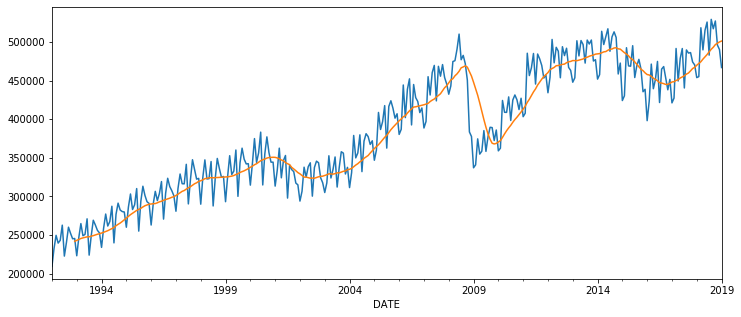

In [52]:
df['UMTMVS'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=12).mean()['UMTMVS'].plot();

**BONUS QUESTION (HARD).**

**Some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak? (Since it crashed immediately after this peak) There are many ways to get this answer. NOTE: I get 70 months as my answer, you may get 69 or 68, depending on whether or not you count the start and end months. Refer to the video solutions for full explanation on this.**

In [54]:
df.resample(rule='M').mean().head()

,UMTMVS
DATE,
1992-01-31,209438.0
1992-02-29,232679.0
1992-03-31,249673.0
1992-04-30,239666.0
1992-05-31,243231.0


In [66]:
df2 = df.loc['2008-01-31':][['UMTMVS']]

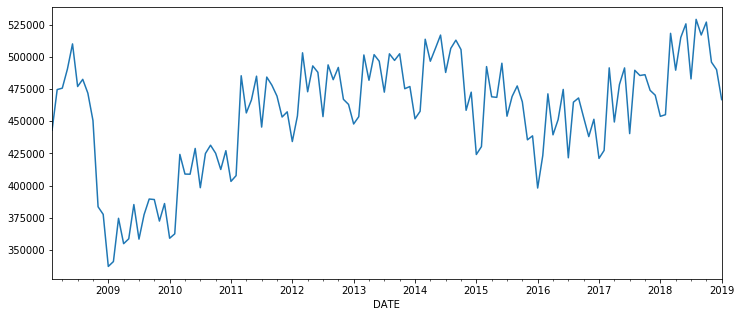

In [76]:
df2['UMTMVS'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

In [78]:
df2['UMTMVS'].idxmin()

Timestamp('2009-01-01 00:00:00')

In [83]:
df3 = df.loc['2008-01-31':'2009-01-01'][['UMTMVS']]

In [84]:
df3.idxmax()

UMTMVS   2008-06-01
dtype: datetime64[ns]

In [86]:
df2['UMTMVS']

DATE
2008-02-01    442996.0
2008-03-01    474592.0
2008-04-01    475667.0
2008-05-01    490500.0
2008-06-01    510081.0
2008-07-01    476948.0
2008-08-01    482530.0
2008-09-01    471799.0
2008-10-01    450521.0
2008-11-01    383475.0
2008-12-01    377578.0
2009-01-01    337101.0
2009-02-01    340896.0
2009-03-01    374521.0
2009-04-01    354790.0
2009-05-01    358584.0
2009-06-01    385206.0
2009-07-01    358332.0
2009-08-01    377369.0
2009-09-01    389504.0
2009-10-01    389108.0
2009-11-01    372369.0
2009-12-01    385999.0
2010-01-01    359013.0
2010-02-01    362439.0
2010-03-01    424203.0
2010-04-01    408902.0
2010-05-01    408799.0
2010-06-01    428819.0
2010-07-01    398302.0
                ...   
2016-08-01    464790.0
2016-09-01    468055.0
2016-10-01    452861.0
2016-11-01    438012.0
2016-12-01    451495.0
2017-01-01    421083.0
2017-02-01    427284.0
2017-03-01    491455.0
2017-04-01    449373.0
2017-05-01    478519.0
2017-06-01    491415.0
2017-07-01    440348.0
2017-0

In [100]:
mask = df2['UMTMVS']>510081.0
df2[mask].iloc[0].name

Timestamp('2014-03-01 00:00:00')

In [101]:
df3.idxmax() - df2[mask].iloc[0].name

UMTMVS   -2099 days
dtype: timedelta64[ns]

In [ ]:
#1 mês = 30 dias
# x meses = 2099 dias

In [103]:
meses= 2099/30
round(meses)

70